# 1D outlier identifiers

Anton Antonov   
January 2025

-----

## Introduction

This notebooks shows (graphical) examples of one-dimensional (1D) outlier identifiers of the Python package ["OutlierIdentifiers"](https://pypi.org/project/OutlierIdentifiers/).

-----

## Setup

In [1]:
from OutlierIdentifiers import *

import numpy as np
import random

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

----

## Data

In [2]:
np.random.seed(14)
vec = np.random.normal(loc=10, scale=20, size=30)
print(vec)

[ 41.02678223  11.58372049  13.47953057   8.55326868 -30.086588
  12.89355626 -20.02337245  14.22218902  -1.16410111  31.6905813
   6.27421752  10.2932275  -11.51138939  22.84504148   6.39326577
  22.40600507  26.21948669  25.55871733   5.25020644 -27.83824691
 -13.44243588  26.72413943  30.18546801  35.86198722  -0.98662331
  -9.6342573   28.29345516  27.46140757  10.44222283   9.91712833]


In [3]:
# Create a scatter plot with markers
fig = go.Figure(data=go.Scatter(y=vec, mode='markers'))

# Add labels and title
fig.update_layout(title='Vector of Numbers', xaxis_title='Index', yaxis_title='Value', template = "plotly_dark")

# Display the plot
fig.show()

----

## Outlier finding

Find outlier positions:

In [4]:
outlier_identifier(vec, identifier=hampel_identifier_parameters)

array([ True, False, False, False,  True, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False, False, False])

Find outlier values:

In [5]:
outlier_identifier(vec, identifier=hampel_identifier_parameters, value = True)

array([ 41.02678223, -30.086588  , -20.02337245,  31.6905813 ,
       -11.51138939, -27.83824691, -13.44243588,  35.86198722,
        -9.6342573 ])

Find top outlier positions and values:

In [6]:
outlier_identifier(vec, identifier = lambda v: top_outliers(hampel_identifier_parameters(v)))

array([ True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

Find bottom outlier positions and values (using quartiles-based identifier):

In [7]:
pred = outlier_identifier(vec, identifier = lambda v: bottom_outliers(quartile_identifier_parameters(v)))
pred

array([False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False])

In [8]:
outlier_identifier(vec, identifier = lambda v: bottom_outliers(quartile_identifier_parameters(v)), value=True)

array([-30.086588  , -20.02337245, -27.83824691])

Here is another way to get the outlier values:

In [9]:
vec[pred]

array([-30.086588  , -20.02337245, -27.83824691])

----

## Apply all available identifiers

The available outlier parameters functions are:

- `hampel_identifier_parameters`
- `splus_quartile_identifier_parameters`
- `quartile_identifier_parameters`


In [12]:
np.random.seed(9823)
vec = np.array(sorted(np.random.normal(loc=10, scale=40, size=130)))

boundaries = [ f(vec) for f in (hampel_identifier_parameters, splus_quartile_identifier_parameters, quartile_identifier_parameters)]

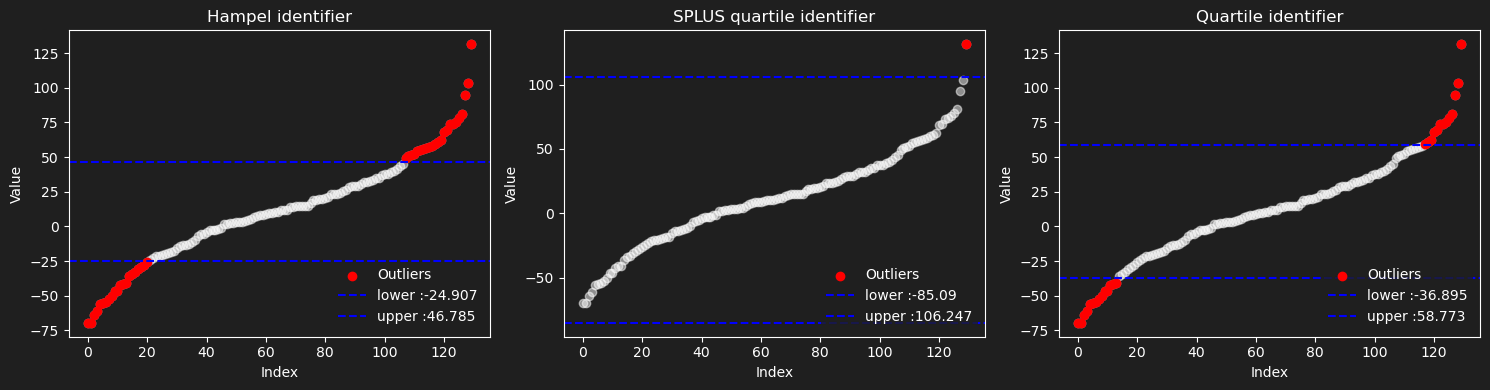

In [13]:
# Outlier boundaries matrix
outlier_matrix = np.array(boundaries)

# Adjust these parameters for plot width
plot_width = 5  # Width in inches
plot_height = 4  # Height of each subplot in inches

fig, axs = plt.subplots(1, 3, figsize=(plot_width * 3, plot_height))  # Three panels in one column

# Setting black background for all subplots
fig.patch.set_facecolor('#1F1F1F')
for ax in axs:
    ax.set_facecolor('#1F1F1F')

for i, (ax, (lower_bound, upper_bound)) in enumerate(zip(axs, boundaries)):
    # Determine which points are outliers
    outliers = (vec < lower_bound) | (vec > upper_bound)
    
    # Plot all points
    ax.scatter(range(len(vec)), vec, color='white', alpha=0.5)
    
    # Highlight outliers in red
    ax.scatter(np.where(outliers)[0], vec[outliers], color='red', label='Outliers')
    
    # Plot the boundary lines
    ax.axhline(y=lower_bound, color='blue', linestyle='--', label='lower :' + str(round(lower_bound, 3)))
    ax.axhline(y=upper_bound, color='blue', linestyle='--', label='upper :' + str(round(upper_bound, 3)))
    
    # Use function names as titles
    func_names = ['Hampel identifier', 'SPLUS quartile identifier', 'Quartile identifier']
    ax.set_title(func_names[i], color='white')
    ax.set_xlabel('Index', color='white')
    ax.set_ylabel('Value', color='white')
    
    # Change text color to white for better visibility on black
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    
    # Add a frame around the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('white')  # Frame color
    
    # Legend with white text for black background
    ax.legend(loc='lower right', facecolor='#1F1F1F', edgecolor='none', labelcolor='white')

plt.tight_layout()
plt.show()